In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

import shap
import lime 
import matplotlib



In [2]:
data = pd.read_csv(r'/Users/ihteshamshah/Desktop/Postdoc/Dataset/NKR_IKNL_breast_syntheticdata.csv')
data.head()

,key_nkr,key_eid,leeft,gesl,incjr,vit_stat,vit_stat_int,tumsoort,diag_basis,topo,...,okd,org_chir,uitgebr_chir_code,dir_reconstr,chemo,target,horm,rt,meta_rt,meta_chir
0,FAKE_PATIENT_1,FAKE_EPISODE_1,93,2,2013,1,390,501300,7,C50,...,0,1,NaN,0,0,4,0,0,0,0
1,FAKE_PATIENT_2,FAKE_EPISODE_2,60,2,2010,0,3592,503200,2,C50,...,0,0,131C50,1,1,0,2,2,0,0
2,FAKE_PATIENT_3,FAKE_EPISODE_3,43,2,2010,0,4011,502200,7,C50,...,0,1,NaN,0,0,0,0,0,0,0
3,FAKE_PATIENT_4,FAKE_EPISODE_4,38,2,2012,0,2811,501300,7,C50,...,0,1,131C50,0,0,0,0,2,0,0
4,FAKE_PATIENT_5,FAKE_EPISODE_5,29,2,2019,0,724,501300,7,C50,...,0,1,131C50,0,0,0,2,2,0,0


In [3]:
data.columns = ['Key_number_patient', 'Key_number_tumor', 'Age', 'Sex', 'Incidence_year', 'Vital_status', 'Incidence_date_and_vital_status_interval_(days)', 'Tumor_type', 'Basis_for_diagnosis', 'Topography_excluding_sublocalization',
                'Topography_including_sublocalization', 'Lateralization', 'Morphology', 'Behaviour', 'Degree_of_differentiation',
                'cT_TNM', 'cN_TNM', 'cm_TNM', 'pT_TNM', 'pN_TNM', 'pM_TNM', 'Stage_based_on_pTNM_supplemented_with_cTNM',
                'Stage_based_on_cTNM', 'Stage_based_on_pTNM', 'Num_lymph_nodes_examined', 'Num_ptve_lymph_nodes', 
                'Er_status', 'Pr_status', 'HER2_state', 'DCIS_to_invasive_tumour',
                'Tumor_multifocality', 'size_tumor_mm', 'Sentinel_procedure_performed', 
                'Results_of_sentinel_lymph_node_procedure', 'MARI_procedure_performed', 'Result_of_MARI_procedure', 
                'Axillary_lymph_node', 'Organ_surgery_performed', 'extensive_surgery',
                'Immediate_reconstruction', 'chemotherapy_classified', 
                'Targeted_therapy', 'Hormonal_therapy_classified_according_to_pre-_and_post-surgical',
                'Radiotherapy', 'Radiotherapy_targeting_metastases_performed', 'Surgery_targeting_metastases_is_performed']
data.head()

,Key_number_patient,Key_number_tumor,Age,Sex,Incidence_year,Vital_status,Incidence_date_and_vital_status_interval_(days),Tumor_type,Basis_for_diagnosis,Topography_excluding_sublocalization,...,Axillary_lymph_node,Organ_surgery_performed,extensive_surgery,Immediate_reconstruction,chemotherapy_classified,Targeted_therapy,Hormonal_therapy_classified_according_to_pre-_and_post-surgical,Radiotherapy,Radiotherapy_targeting_metastases_performed,Surgery_targeting_metastases_is_performed
0,FAKE_PATIENT_1,FAKE_EPISODE_1,93,2,2013,1,390,501300,7,C50,...,0,1,NaN,0,0,4,0,0,0,0
1,FAKE_PATIENT_2,FAKE_EPISODE_2,60,2,2010,0,3592,503200,2,C50,...,0,0,131C50,1,1,0,2,2,0,0
2,FAKE_PATIENT_3,FAKE_EPISODE_3,43,2,2010,0,4011,502200,7,C50,...,0,1,NaN,0,0,0,0,0,0,0
3,FAKE_PATIENT_4,FAKE_EPISODE_4,38,2,2012,0,2811,501300,7,C50,...,0,1,131C50,0,0,0,0,2,0,0
4,FAKE_PATIENT_5,FAKE_EPISODE_5,29,2,2019,0,724,501300,7,C50,...,0,1,131C50,0,0,0,2,2,0,0


#### Droping out all the irrelevent columns or those having too much null velues

...

In [4]:
data.drop(['Stage_based_on_pTNM_supplemented_with_cTNM', 'pN_TNM','pM_TNM', 'pT_TNM' ,'cT_TNM', 'cN_TNM', 'Stage_based_on_pTNM','Stage_based_on_cTNM','Key_number_patient','Topography_including_sublocalization', 'Results_of_sentinel_lymph_node_procedure', 'Result_of_MARI_procedure','MARI_procedure_performed','Incidence_year','Key_number_tumor', 'Topography_excluding_sublocalization', 'extensive_surgery', 'Surgery_targeting_metastases_is_performed'], axis=1, inplace = True)


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Age                                                              60000 non-null  int64  
 1   Sex                                                              60000 non-null  int64  
 2   Vital_status                                                     60000 non-null  int64  
 3   Incidence_date_and_vital_status_interval_(days)                  60000 non-null  int64  
 4   Tumor_type                                                       60000 non-null  int64  
 5   Basis_for_diagnosis                                              60000 non-null  int64  
 6   Lateralization                                                   58391 non-null  float64
 7   Morphology                              

In [6]:
## droping Null values

data.dropna(inplace=True)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 30680 entries, 0 to 59999
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Age                                                              30680 non-null  int64  
 1   Sex                                                              30680 non-null  int64  
 2   Vital_status                                                     30680 non-null  int64  
 3   Incidence_date_and_vital_status_interval_(days)                  30680 non-null  int64  
 4   Tumor_type                                                       30680 non-null  int64  
 5   Basis_for_diagnosis                                              30680 non-null  int64  
 6   Lateralization                                                   30680 non-null  float64
 7   Morphology                                   

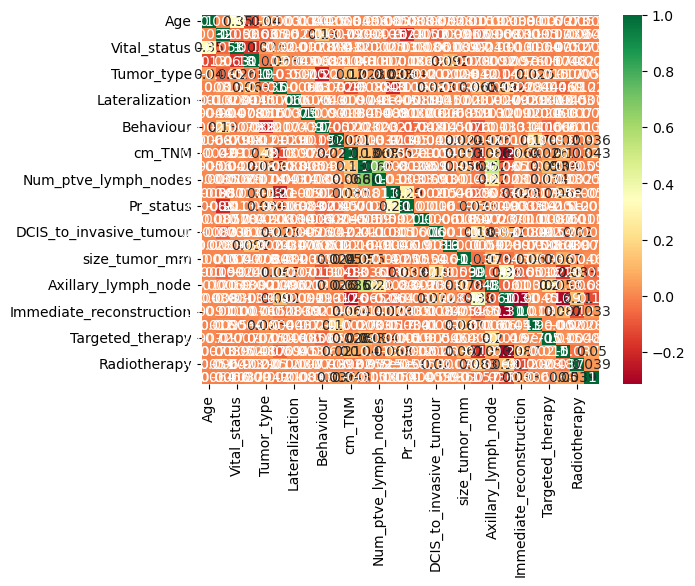

In [7]:
import matplotlib as plt
import seaborn as sns

corr_map= data.corr()
top_correlation_features= corr_map.index
#plt.figure(figsize=(20,20))
# plot Heat map
g=sns.heatmap(data[top_correlation_features].corr(),annot=True, cmap="RdYlGn")

In [8]:
#drop null values
data.dropna(inplace=True)

In [9]:
new_dataset=data

# Interpretable model testing

We considered two models here  

##### (i) LogisticRegression 
##### (ii) ExplainableBoostingClassifier 
and there outcomes are interpreted both locally and globally 

We also taken RandomForest Classifier as balckbox model and LIME and SHAP technique is used 
for generating explainations of outcomes 

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

In [11]:
x = new_dataset.loc[:, ~new_dataset.columns.isin(['Organ_surgery_performed'])]

y = new_dataset['Organ_surgery_performed'] 

In [12]:
#trianing and testing split 80% and 20% respectivily

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## logistic regression model

In [1]:
# %% Fit logistic regression model
lr = LogisticRegression(feature_names=x_train.columns, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


NameError: name 'LogisticRegression' is not defined

In [14]:
# %% Explain local prediction
lr_local = lr.explain_local(x_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)


<!-- http://127.0.0.1:7001/10968243984/ -->

In [15]:
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

<!-- http://127.0.0.1:7001/10832766032/ -->

## Explainable Boosting Machine

In [16]:
# %% Fit Explainable Boosting Machine
ebm = ExplainableBoostingClassifier(random_state=2021)
ebm.fit(x_train, y_train) 
print("Training finished.")
y_pred = ebm.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")



Training finished.
F1 Score 0.8362029565870299
Accuracy 0.9488265971316818


In [17]:
# %% Explain local prediction
ebm_local = ebm.explain_local(x_test[:100], y_test[:100], name='Explainable Boosting Machine')
show(ebm_local)

<!-- http://127.0.0.1:7001/10964486480/ -->

In [18]:
# %% Explain globally
ebm_global = ebm.explain_global(name='Explainable Boosting Machine')
show(ebm_global)
# %%

<!-- http://127.0.0.1:7001/10959473552/ -->

In [19]:
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")



F1 Score 0.8418624086121416
Accuracy 0.9511082138200783


In [20]:
from interpret.blackbox import LimeTabular
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(rf.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-1:], 
                                y_test[-1:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/10821061904/ -->

In [21]:
#!pip install lime

In [22]:
#!pip install shap

In [26]:
# %% Create SHAP explainer

explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 200
shap_values = explainer.shap_values(x_test[start_index:end_index])
x_test[start_index:end_index]


,Age,Sex,Vital_status,Incidence_date_and_vital_status_interval_(days),Tumor_type,Basis_for_diagnosis,Lateralization,Morphology,Behaviour,Degree_of_differentiation,...,Tumor_multifocality,size_tumor_mm,Sentinel_procedure_performed,Axillary_lymph_node,Immediate_reconstruction,chemotherapy_classified,Targeted_therapy,Hormonal_therapy_classified_according_to_pre-_and_post-surgical,Radiotherapy,Radiotherapy_targeting_metastases_performed
10788,69,2,0,3049,501300,7,2.0,8500,3,3,...,0.0,16.0,1,0,0,0,0,2,2,0
6726,48,2,0,1035,501300,7,2.0,8500,3,9,...,1.0,0.0,0,0,0,0,1,0,0,1
9601,66,2,0,2070,501300,7,1.0,8982,3,2,...,0.0,23.0,1,0,0,0,0,0,2,0
59812,58,2,0,2617,501300,7,2.0,8500,3,1,...,0.0,19.0,1,0,0,0,0,0,2,0
58098,85,2,0,3446,501300,7,2.0,8500,3,1,...,0.0,4.0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47717,76,2,0,920,501300,7,2.0,8500,3,3,...,0.0,0.0,1,0,0,2,0,0,2,0
16481,53,2,0,1199,501300,7,2.0,8500,3,1,...,0.0,11.0,1,0,0,0,0,0,2,0
49905,71,1,1,1889,501300,7,1.0,8520,3,2,...,0.0,14.0,1,0,0,2,0,3,0,0
38751,77,2,1,130,501300,7,2.0,8524,3,2,...,0.0,8.0,1,0,0,0,0,2,0,0


In [24]:
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values


(199, 27)


[array([[-8.05154430e-04,  1.45405472e-06, -1.03156415e-04, ...,
         -2.25593352e-02, -9.43556345e-03, -2.06716580e-03],
        [ 6.12900717e-03, -1.20713923e-04,  2.74474687e-03, ...,
         -2.72260252e-02,  7.28702831e-02,  1.39306948e-01],
        [-2.35314633e-03,  6.52991829e-06, -1.34247234e-04, ...,
         -1.48107328e-02, -1.27922519e-02, -2.82050203e-03],
        ...,
        [-4.02898491e-03,  4.46711385e-04,  6.81158422e-04, ...,
         -1.73649011e-02,  1.45008498e-02, -2.10585331e-03],
        [-3.03922869e-04,  8.73078312e-06,  3.86822729e-04, ...,
         -3.05796731e-02,  1.53847128e-02, -1.53951657e-03],
        [ 4.36268666e-03,  5.84157322e-06, -1.35305285e-03, ...,
         -3.21111319e-02,  1.49218544e-02, -3.39621024e-03]]),
 array([[ 8.05154430e-04, -1.45405472e-06,  1.03156415e-04, ...,
          2.25593352e-02,  9.43556345e-03,  2.06716580e-03],
        [-6.12900717e-03,  1.20713923e-04, -2.74474687e-03, ...,
          2.72260252e-02, -7.28702831e

In [1]:
# %% >> Visualize local predictions
shap.initjs()


NameError: name 'shap' is not defined

In [ ]:
# Force plot
prediction = rf.predict(x_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[0],
                shap_values[1],
                x_test[start_index:end_index]) # for values

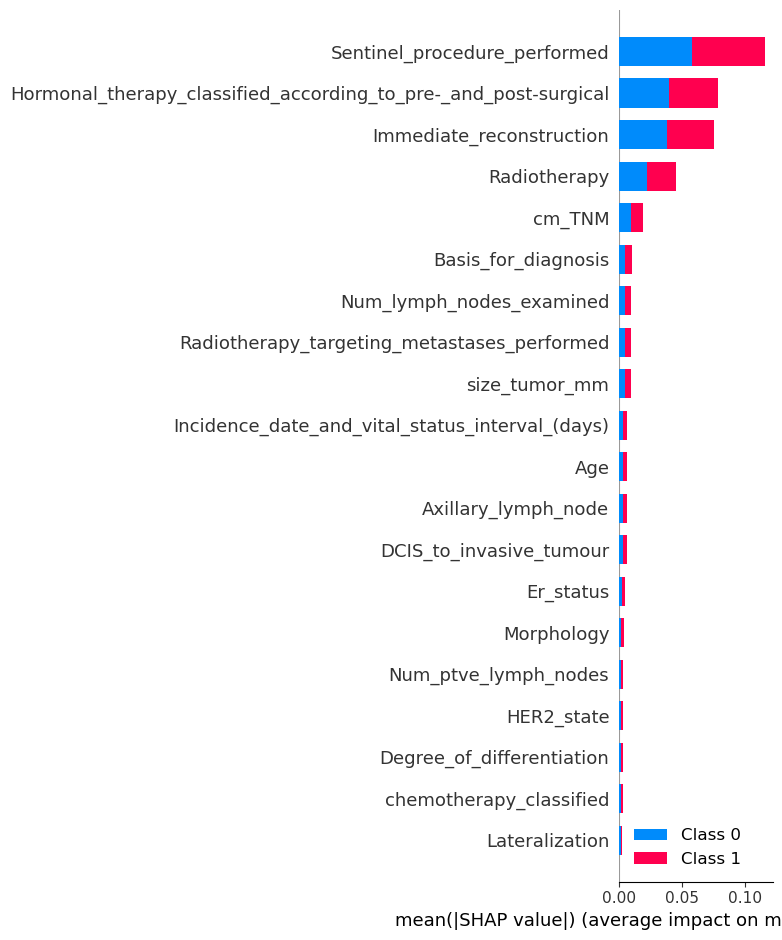

In [27]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, x_test)

In [51]:
# visualize the first prediction's explanation
#shap.plots.bar(shap_values[0], x_test)

In [52]:
# %% Apply lime
# Initilize Lime for Tabular data


lime = LimeTabular(rf.predict_proba, 
                   data=x_train, 
                   random_state=1)

In [53]:
# Get local explanations
lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7929/10975755856/ -->

# Get global explaination from lime.

This technique is presented in following paper (https://arxiv.org/pdf/1907.03039.pdf) 


-> Run the algorithm on all test-set 
-> Store score of each feature for each pridiction. 
-> Get average global score for each feature in following manner

I_cj = sum_{i \belongs Sc} [abs (Wij)] / sum_{i \belongs Sc}: wij != 0

Here c represents class, j is specific feature, i is instance for the subset where class c is classified, wij represents the  feature atributions.

Below is the explaination of variables 

     -class0_features_importance_score ( contains sum of all the features values for each pridiction as class0)
                
     -class1_features_importance_score ( contains the features values for each pridiction as class1)
                
     -number_prediction_as_class1 (number of time class1 pridicted: update each feature if it took part in generating the outcome for this local point )
       
     -number_prediction_as_class0 (number of time class0 pridicted: update each feature if it took part in generating the outcome for this local point )
     
    

In [54]:
import lime
from lime import lime_tabular
import warnings

# Turn off all warnings
warnings.filterwarnings("ignore")


In [55]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification' )

exp = explainer.explain_instance(
    data_row=x_test.iloc[1], 
    predict_fn=rf.predict_proba,
    num_features = len(x_test.columns)
)

print(exp.local_exp)

{1: [(21, 0.3298904064650892), (10, 0.09825332173541751), (25, 0.07917267119804348), (26, 0.0633999747399567), (24, 0.04200331685169899), (22, -0.029823663857511545), (3, -0.02062865832066401), (12, 0.01385233996789408), (0, 0.011971424313108672), (11, 0.010183505664438984), (15, 0.008259246290029996), (4, -0.00718044073552776), (2, 0.006795788450908268), (9, 0.006334137354271688), (13, 0.0059003704224952665), (14, 0.004865084420888364), (20, -0.004850437595062594), (7, 0.004262008337343616), (16, 0.0028904982635934782), (17, -0.0027741804688719463), (23, 0.002136789951639131), (6, 0.0012012494802730157), (19, -0.0007534200465077553), (18, 0.0005680406006072397), (1, 0.0), (5, 0.0), (8, 0.0)]}


In [56]:
#local Explaination

#exp.show_in_notebook(show_table=True)

In [57]:
#Global Explaination

features = x_train.columns
class1_features_importance_score = [0] * 27
class0_features_importance_score = [0] * 27 

#number of time classifier predicted as class1 or class0 for each (this variable is used for averaging)
number_prediction_as_class1 = [0] * 27
number_prediction_as_class0 =[0] * 27

In [58]:
X_test= x_test[-100:] # Taking 100 entries 
#number of time classifier predicted as class1 or class0 (this variable is used for averaging)

for j in range(len(X_test)):
    
    exp = explainer.explain_instance(
    data_row=x_test.iloc[j], 
    predict_fn=rf.predict_proba)
    #print('predtion', exp.local_pred)
    length_explaination_features=len(exp.local_exp[1])
    
    for i in range(length_explaination_features):
        local_feature_index = exp.local_exp[1][i][0] 
        local_value_at_index = exp.local_exp[1][i][1]

        
        if exp.local_pred >= 0.5 :
            class1_features_importance_score[local_feature_index] += abs(local_value_at_index) 
            number_prediction_as_class1[local_feature_index] += 1 
            
        else:
            class0_features_importance_score[local_feature_index] += abs(local_value_at_index)
            number_prediction_as_class0[local_feature_index] += 1
            
        

In [59]:
# Perform element-wise division (to get the avarge global importance score of each feature in each class)
# Initialize an empty list to store the result
global_score_class1 = []
global_score_class0 = []

# Iterate through the arrays and divide corresponding elements, ignoring if there is a zero entry

        # for class 0
        
for a, b in zip(class0_features_importance_score, number_prediction_as_class0):
    if b != 0:  # Check if the element in the second array is not zero
        global_score_class0.append(a / b)
    else:
        global_score_class0.append(a)  # Add same entry
        
        
        # for class 1
        
for a, b in zip(class1_features_importance_score, number_prediction_as_class1):
    if b != 0:  # Check if the element in the second array is not zero
        global_score_class1.append(a / b)
    else:
        global_score_class1.append(a)  # Add same entry


            
       
print("global_score_class0:", global_score_class0)
print("global_score_class1:", global_score_class1)

global_score_class0: [0.010329269872177934, 0, 0, 0, 0.05222596459431478, 0, 0, 0, 0, 0, 0.09610703309519418, 0.01215191220971991, 0, 0.023603939700147385, 0, 0, 0, 0, 0, 0.015700059245183036, 0, 0.3298228896287276, 0, 0, 0.18024536629399626, 0.08263586293088787, 0.06661416117542349]
global_score_class1: [0.014182958559089126, 0, 0, 0.017523688389456126, 0.03727416017341345, 0, 0.010293743200803986, 0.012760606993905375, 0, 0.011384805007282525, 0.10118263531961691, 0.01235358997138031, 0.013023311187815498, 0.034923091288397046, 0.008802215779813473, 0.013199360303563726, 0.0067929377889942326, 0.01104236789779407, 0.009619964531230691, 0.043459015114418124, 0.011449131581933359, 0.31891038300610214, 0.011165774410312445, 0.013781856086343122, 0.036459752471792534, 0.07550199596604092, 0.05750719198044372]


In [60]:
#  features that contribute more in both clases

max_index1 = global_score_class1.index(max(global_score_class1))
max_index0 = global_score_class0.index(max(global_score_class0))
print('max_feature_calss1:',x_test.columns[max_index1])
print('max_feature-class0:',x_test.columns[max_index0])

max_feature_calss1: Immediate_reconstruction
max_feature-class0: Immediate_reconstruction


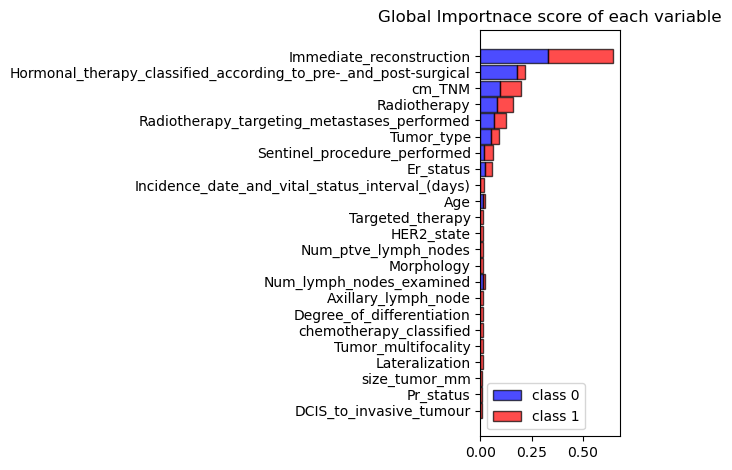

In [61]:
#plot the bars in descending order of their values

import matplotlib.pyplot as plt
import numpy as np

variables = x_test.columns
values1 = global_score_class0 
values2 = global_score_class1

# Filter out variables with 0 values
non_zero_variables = []
non_zero_values1 = []
non_zero_values2 = []
for var, val1, val2 in zip(variables, values1, values2):
    if val1 != 0 or val2 != 0:
        non_zero_variables.append(var)
        non_zero_values1.append(val1)
        non_zero_values2.append(val2)

# Sort variables and values in descending order of values
sorted_data = sorted(zip(non_zero_variables, non_zero_values1, non_zero_values2), key=lambda x: max(x[1], x[2]), reverse=False)
sorted_variables, sorted_values1, sorted_values2 = zip(*sorted_data)

# Define the width of each bar
bar_width = 0.9

# Define the gap between different features
gap = 0.2

# Define the x-axis positions for the bars
x = np.arange(len(sorted_variables))

# Plot the first set of values (values1)
plt.barh(x, sorted_values1, color='blue', label='class 0', height=bar_width, edgecolor='black', alpha=0.7)

# Plot the second set of values (values2)
plt.barh(x, sorted_values2, color='red', label='class 1', height=bar_width, left=sorted_values1, edgecolor='black', alpha=0.7)

# Set y-ticks with sorted variable names
plt.yticks(x, sorted_variables)

# Add labels and legend
#plt.xlabel('Values')
#plt.ylabel('Variables')
plt.title('Global Importnace score of each variable')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# Kernal Shap Explainer 
### for stability and fidelity measure

In [28]:
import shap
# Define the number of samples to summarize the background data
K = 100  # Choose an appropriate value for K

# Summarize the background data using shap.sample()
background_sample = shap.sample(x_train, K)

# Use the summarized background sample in your SHAP model
# Use the summarized background sample in your SHAP model
Shap_explainer = shap.KernelExplainer(model=rf.predict_proba, data=background_sample)


In [47]:
#explaination for a single instance, 8
start_index = 1
end_index = 200
shap_values = Shap_explainer.shap_values(x_test[start_index:end_index], nsamples=500, l1_reg="num_features(28)")


  0%|          | 0/199 [00:00<?, ?it/s]

# 

The shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome (No surgery), and the second array is the list of SHAP values for the positive outcome (Surgery). We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out shap_values[1])

In [48]:
shap_values[1][1]

array([-0.00781495, -0.00297458, -0.00372037,  0.00923571,  0.        ,
        0.00061536,  0.00381328, -0.00741101,  0.        , -0.01156377,
        0.00239805,  0.00965207, -0.00135316,  0.00108113,  0.00970999,
       -0.00220826, -0.02888449,  0.00942607,  0.00833286, -0.19327573,
        0.00754339,  0.03305879,  0.00659429,  0.00184606,  0.00074497,
       -0.07714788, -0.13459781])

In [46]:
# %% >> Visualize global features
# Feature summary
shap_values[1][1]

array([-0.00057201,  0.00045082,  0.00138681, -0.00031693,  0.        ,
        0.00093294,  0.00967513, -0.00776338,  0.        , -0.00753199,
       -0.00118474,  0.00984673, -0.00144089,  0.00638084,  0.00663027,
        0.00270359, -0.02461259,  0.00293061,  0.01377234, -0.19312141,
        0.00058264,  0.03393863, -0.00287501, -0.0049768 , -0.00573264,
       -0.07718035, -0.12882262])

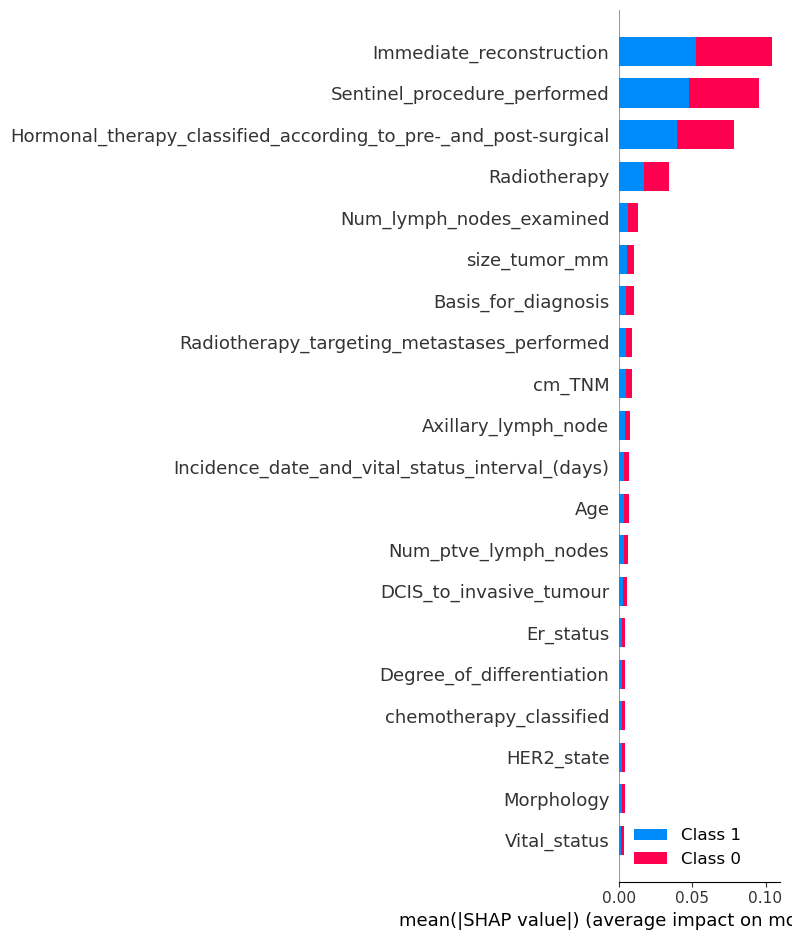

In [45]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, x_test)

In [164]:
#shap_values[0] represents value for class 0 and shap_values[1] gives value for class 1
shap_values

[array([[ 0.00000000e+00, -1.05432422e-03, -1.00220756e-03,
         -9.63422939e-04,  9.16962597e-04, -4.63292045e-03,
          5.14465009e-04, -2.80723301e-03, -1.86902015e-03,
          0.00000000e+00, -5.29552815e-03,  2.44950030e-05,
          5.62192539e-04, -1.92746110e-04, -1.11482430e-03,
         -9.00329490e-05,  2.92193368e-03, -1.86312709e-03,
         -4.82864143e-03, -4.44212457e-02,  7.50092693e-03,
         -1.55277481e-02,  5.21188572e-04,  7.02114620e-03,
         -1.83905410e-02,  1.10683220e-02, -3.09120827e-03]]),
 array([[ 0.00000000e+00,  1.05432422e-03,  1.00220756e-03,
          9.63422939e-04, -9.16962596e-04,  4.63292045e-03,
         -5.14465009e-04,  2.80723301e-03,  1.86902015e-03,
          0.00000000e+00,  5.29552815e-03, -2.44950030e-05,
         -5.62192539e-04,  1.92746110e-04,  1.11482430e-03,
          9.00329490e-05, -2.92193368e-03,  1.86312709e-03,
          4.82864143e-03,  4.44212457e-02, -7.50092693e-03,
          1.55277481e-02, -5.21188572

In [178]:
shap_values[1]

array([[ 0.00000000e+00,  1.05432422e-03,  1.00220756e-03,
         9.63422939e-04, -9.16962596e-04,  4.63292045e-03,
        -5.14465009e-04,  2.80723301e-03,  1.86902015e-03,
         0.00000000e+00,  5.29552815e-03, -2.44950030e-05,
        -5.62192539e-04,  1.92746110e-04,  1.11482430e-03,
         9.00329490e-05, -2.92193368e-03,  1.86312709e-03,
         4.82864143e-03,  4.44212457e-02, -7.50092693e-03,
         1.55277481e-02, -5.21188572e-04, -7.02114620e-03,
         1.83905410e-02, -1.10683220e-02,  3.09120827e-03]])

## Explaining the single instance 

Prediction for 1st sample in X_test: [0.02 0.98]
[0.09609314 0.90390686]


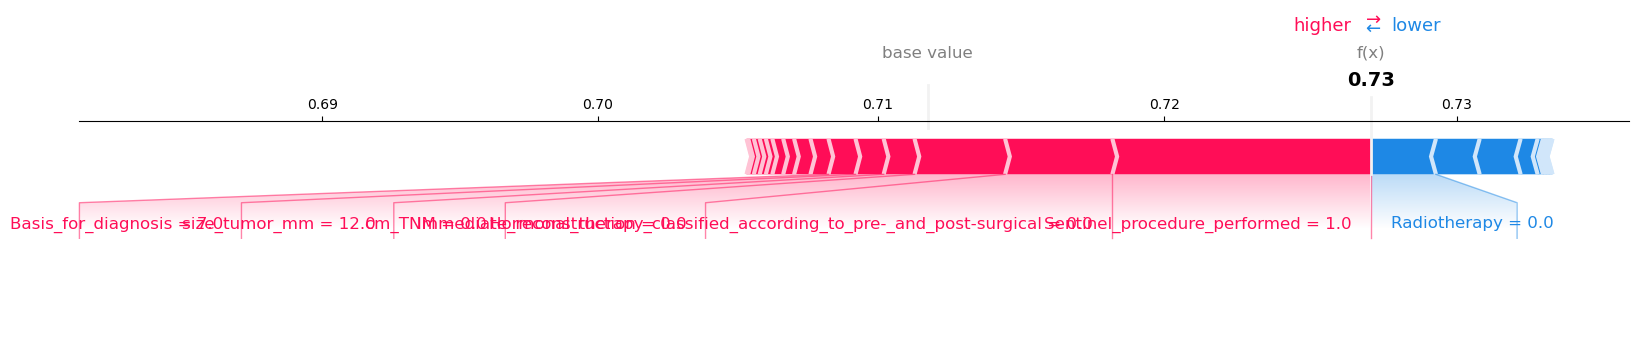

In [182]:
# plot the SHAP values for the Setosa output of the first instance
print(f'Prediction for 1st sample in X_test: {rf.predict_proba(x_test[start_index:end_index])[0]}')

#pridiction probabilites of this single instance, x_test.iloc[0,:]
print(explainer.expected_value)

shap.force_plot(
    Shap_explainer.expected_value[1], shap_values[1], x_test[start_index:end_index], link="logit", 
    matplotlib=True # <-- 
) 


In [183]:
import math 
math.log10(a)

1.6901960800285132

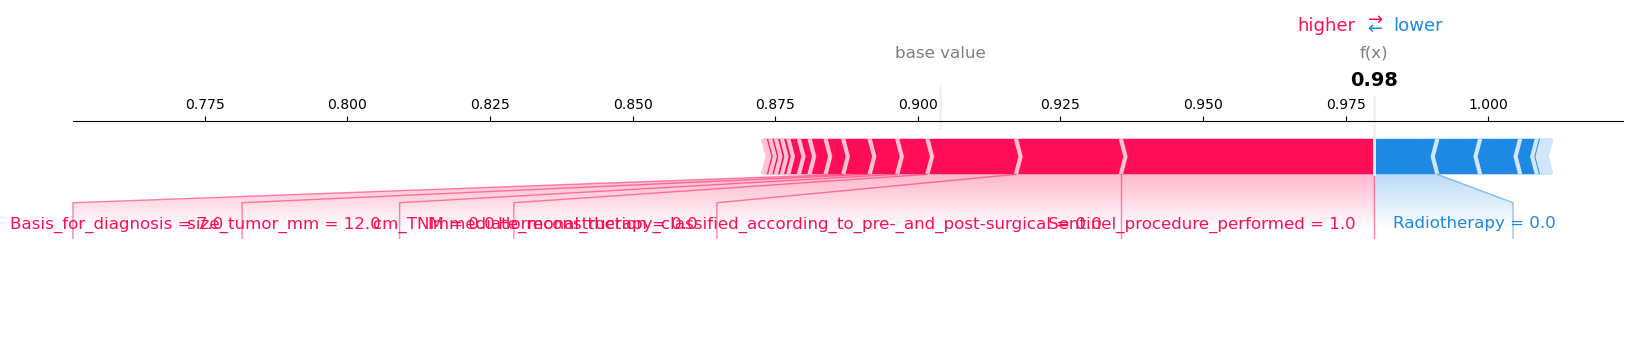

In [172]:
shap.force_plot(Shap_explainer.expected_value[1], shap_values[1], x_test[start_index:end_index], matplotlib=True )


We predicted 0.98, whereas the base_value is 0.90. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Goal Scored being 2. Though the ball possession value has a meaningful effect decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

There is some complexity to the technique, to ensure that the baseline plus the sum of individual effects adds up to the prediction (which isn't as straightforward as it sounds). We won't go into that detail here, since it isn't critical for using the technique. This blog post has a longer theoretical explanation.



In [169]:
#Randomforest pridiction probailities for single instance "" x_test[start_index:end_index]""
rf.predict_proba(x_test[6:7])

rf.predict_proba(x_test[6:7])[0][1]

0.98

In [166]:
#Shap Probabilities for pridicting class which has higher outcomes . 
Shap_explainer.fnull[1] + np.sum(shap_values[1])

0.98

# Stability and Fidelity of Lime & Shap 
we employ Lime on a specific unit of the dataset and we test its stability using the CSI and VSI indices by using ### LimeTabularExplainerOvr ###

In [62]:
from lime_stability.stability import LimeTabularExplainerOvr

In [96]:
#rather then using "LimeTabularExplainer " use "LimeTabularExplainerOvr". It contains stability parameter
# csi = coficient stability index, 
#vsi = Variable stability index.

Lime_explainer = LimeTabularExplainerOvr(training_data=np.array(x_train), 
                                    feature_names=x_train.columns, 
                                    class_names=['surgey','not'], 
                                    verbose=True, 
                                    mode='classification')

Lime_exp = explainer.explain_instance(
    data_row=x_test.iloc[2], 
    predict_fn=rf.predict_proba,
    num_samples= 5000,
    num_features = len(x_test.columns) ,
    distance_metric="euclidean"
)
  

Intercept 0.24178106754707818
Prediction_local [0.96818256]
Right: 1.0


In [123]:
#fidelity score for LIME
Lime_exp.score

0.49663697599559153

In [103]:
#LIME and SHAP stability and fidelity over 20 randomly selected instances
Lime_CSI = []
Lime_VSI = []


Lime_fidelity=[]
Shap_fidelity=[]

x=np.random.randint(1000, size=(20)) #randomly pick 20 instances from data (in the range of 1000 intances)

for i in x:
    Data_row= x_test.iloc[i] #single instance from the test dataset
    
    #lime fidelity
    Lime_exp = Lime_explainer.explain_instance( data_row=Data_row, 
                                    predict_fn=rf.predict_proba,
                                    num_samples= 5000,
                                    num_features = len(x_test.columns) ,
                                    distance_metric="euclidean")
    
    #AA= np.array(exp.local_pred, dtype==int)
    Lime_fidelity.append(exp.local_pred[0])
    
    #SHAP fidelity
    shap_values_single_instance = Shap_explainer.shap_values(Data_row, nsamples=100, l1_reg="num_features(28)")
    shap_fedilty= ((rf.predict_proba(x_test[i:i+1])[0][1]) /
                (Shap_explainer.fnull[1] + np.sum(shap_values_single_instance[1])))
    Shap_fidelity.append(shap_fedilty)

    #Lime Stability 
    lime_csi, lime_vsi = Lime_explainer.check_stability(n_calls=3,data_row=Data_row, 
        predict_fn=rf.predict_proba,
        num_features = len(x_test.columns) ,
        distance_metric="euclidean",
        index_verbose=False )
    Lime_CSI.append(lime_csi)
    Lime_VSI.append(lime_vsi)

print("CSI: ",CSI,"\nVSI: ",VSI,"\n Lime fidelity:",Lime_fidelity, "\n Shap fidelity:", Shap_fidelity ) 




Intercept 0.6400256979266683
Prediction_local [0.39691434]
Right: 0.36
Intercept 0.42685798294196264
Prediction_local [0.84495859]
Right: 0.98
Intercept 0.4623384058161995
Prediction_local [0.8784877]
Right: 0.99
Intercept 0.46156365628741247
Prediction_local [0.78323993]
Right: 1.0
Intercept 0.5986592252080332
Prediction_local [0.57426264]
Right: 0.98
Intercept 0.6865623273386705
Prediction_local [0.49364492]
Right: 0.21
Intercept 0.28292905175072125
Prediction_local [0.79909197]
Right: 1.0
Intercept 0.2710042637988318
Prediction_local [0.94126113]
Right: 1.0
Intercept 0.22304811709521544
Prediction_local [0.91600863]
Right: 1.0
Intercept 0.17269464575230786
Prediction_local [0.9647512]
Right: 0.99
Intercept 0.31637230607732025
Prediction_local [0.84656618]
Right: 1.0
Intercept 0.3306225685101024
Prediction_local [0.737842]
Right: 0.74
Intercept 0.325618039791034
Prediction_local [0.88247568]
Right: 0.84
Intercept 0.21781505097065557
Prediction_local [0.97689822]
Right: 1.0
Intercept 

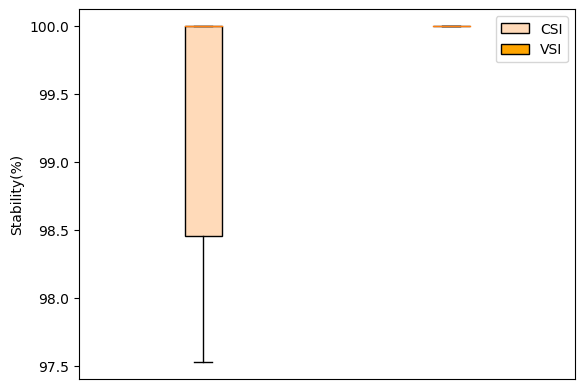

In [108]:
# Lime stability plot 
import matplotlib.pyplot as plt

data = [ Lime_CSI, Lime_VSI]
#data1=CSI
#data2=VSI

labels = ['CSI', 'VSI']
colors = ['peachpuff', 'orange']

fig, ax = plt.subplots()
ax.set_ylabel('Stability(%)')

bplot = ax.boxplot(data,
                   patch_artist=True)  # fill with color

# fill with colors and add legend labels
for patch, color, label in zip(bplot['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
    
ax.legend()
ax.get_xaxis().set_visible(False)

plt.show()

In [69]:
a=[]
for i in range (10):
    a.append(i)
print(a)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [122]:
np.zeros(10)+1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

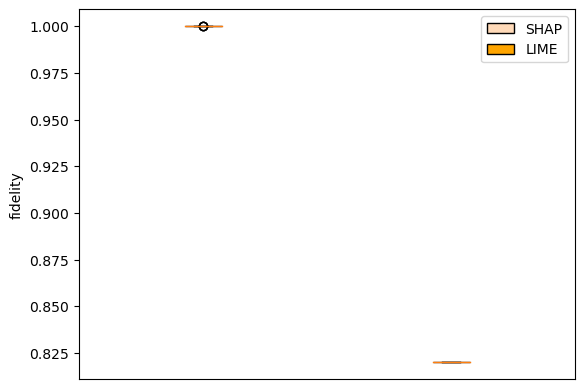

In [121]:
# Fidelity Plot for LIME and SHAP
# Import libraries
import matplotlib.pyplot as plt
#Lime_fidelity = list(np.around(np.array(Lime_fidelity),2)) 

data = [ Shap_fidelity, Lime_fidelity]
data1=CSI
data2=VSI

labels = ['SHAP', 'LIME']
colors = ['peachpuff', 'orange']

fig, ax = plt.subplots()
ax.set_ylabel('fidelity')

bplot = ax.boxplot(data,
                   patch_artist=True)  # fill with color

# fill with colors and add legend labels
for patch, color, label in zip(bplot['boxes'], colors, labels):
    patch.set_facecolor(color)
    patch.set_label(label)
    
ax.legend()
ax.get_xaxis().set_visible(False)

plt.show()